In [25]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv")

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
from sklearn.cluster  import KMeans


In [29]:
from matplotlib.pyplot import axis


x=df.drop(["CustomerID","Gender","Age"],axis="columns")
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [30]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

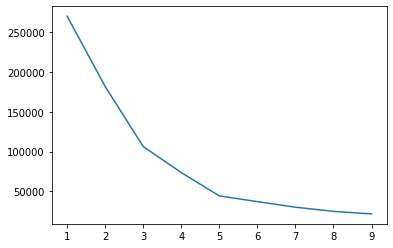

In [31]:
plt.plot(k_range,sse)

In [39]:
km=KMeans(n_clusters=5)
cluster=km.fit_predict(x)
cluster

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [33]:
x["cluster"]=cluster

In [34]:
x

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [42]:
df0=x[x["cluster"]==0]
df1=x[x["cluster"]==1]
df2=x[x["cluster"]==2]
df3=x[x["cluster"]==3]
df4=x[x["cluster"]==4]

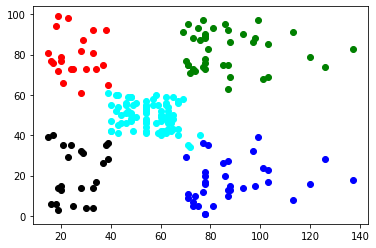

In [43]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"],c="blue")
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],c="red")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],c="cyan")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],c="green")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],c="black")

In [44]:
km.cluster_centers_

array([[ 8.65384615e+01,  8.21282051e+01,  3.00000000e+00],
       [ 5.52962963e+01,  4.95185185e+01,  2.00000000e+00],
       [ 8.82000000e+01,  1.71142857e+01, -1.55431223e-15],
       [ 2.63043478e+01,  2.09130435e+01,  4.00000000e+00],
       [ 2.57272727e+01,  7.93636364e+01,  1.00000000e+00]])

Text(0, 0.5, 'Soending score')

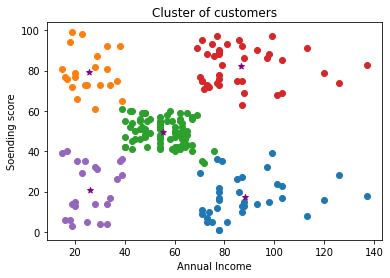

In [50]:
plt.scatter(df0["Annual Income (k$)"],df0["Spending Score (1-100)"])
plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"])
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"])
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"])
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="purple")
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Soending score")